In [ ]:
!pip install pydot
!pip install graphviz
!pip install tensorflow
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential, load_model
from keras.layers import LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


In [ ]:
df=pd.read_csv("microsoft_stocks.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396
2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340
2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257
2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129
2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313


In [ ]:
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1925, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

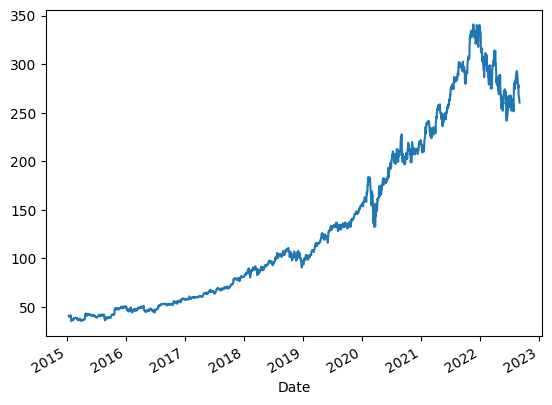

In [ ]:
df['Adj Close'].plot()

In [ ]:
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2015-01-12,0.023268,0.022011,0.021952,0.100324
2015-01-13,0.021789,0.023209,0.020960,0.172161
2015-01-14,0.018470,0.017803,0.019505,0.137840
2015-01-15,0.019324,0.018257,0.018811,0.156581
2015-01-16,0.016334,0.017933,0.018018,0.174787


In [ ]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
import numpy as np

In [ ]:
trainX =np.array(X_train)
testX =np.array(X_test)
print("Original shapes - Train:", trainX.shape, "Test:", testX.shape)

Original shapes - Train: (1750, 1, 4) Test: (175, 1, 4)


In [ ]:
X_train = trainX.reshape(trainX.shape[0], 1, -1)

# Reshape the test set
X_test = testX.reshape(testX.shape[0], 1, -1)

# Print the shape of the reshaped data for verification
print("Reshaped shapes - Train:", X_train.shape, "Test:", X_test.shape)


Reshaped shapes - Train: (1750, 1, 4) Test: (175, 1, 4)


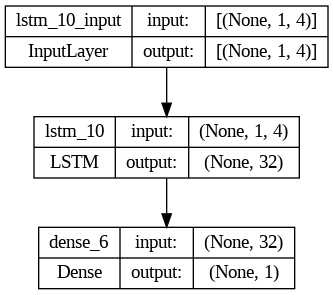

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, X_train.shape[2]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
219/219 [==============================] - 3s 6ms/step - loss: 19944.6934
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 18547.5918
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 16487.7754
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 13873.0596
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 11038.8115
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 8318.2031
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 5958.3081
Epoch 8/100
219/219 [==============================] - 1s 4ms/step - loss: 4092.9182
Epoch 9/100
219/219 [==============================] - 1s 4ms/step - loss: 2746.0894
Epoch 10/100
219/219 [==============================] - 1s 4ms/step - loss: 1855.7424
Epoch 11/100
219/219 [==============================] - 1s 4ms/step - loss: 1309.5043
Epoch 12/100
219/219 [==============================] - 1s

In [ ]:
y_pred= lstm.predict(X_test)

6/6 [==============================] - 0s 2ms/step


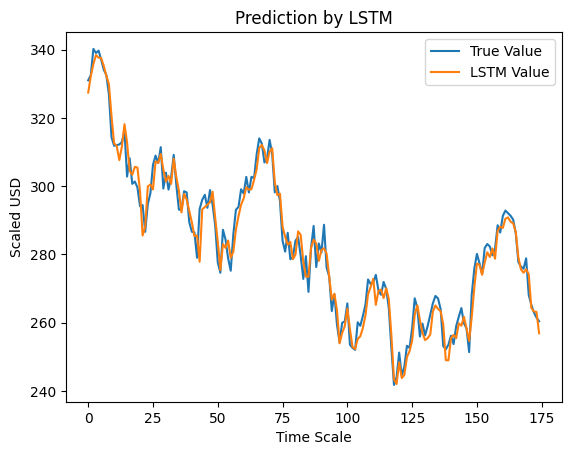

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
import matplotlib.pyplot as plt

plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()